In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data.csv']


In [2]:
fifa_df = pd.read_csv("../input/data.csv")

In [3]:
fifa_df.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [5]:
# Try to get some useful features and this featuref is not null
useful_feat     = ['Name',
                   'Age',
                   'Photo', 
                   'Nationality', 
                   'Flag',
                   'Overall',
                   'Potential', 
                   'Club', 
                   'Club Logo', 
                   'Value',
                   'Wage',
                   'Preferred Foot',
                   'International Reputation',
                   'Weak Foot',
                   'Skill Moves',
                   'Work Rate',
                   'Body Type',
                   'Position',
                   'Joined', 
                   'Contract Valid Until',
                   'Height',
                   'Weight',
                   'Crossing', 
                   'Finishing',
                   'HeadingAccuracy',
                   'ShortPassing', 
                   'Volleys', 
                   'Dribbling',
                   'Curve',
                   'FKAccuracy',
                   'LongPassing',
                   'BallControl',
                   'Acceleration',
                    'SprintSpeed',
                   'Agility',
                   'Reactions', 
                   'Balance',
                   'ShotPower', 
                   'Jumping',
                   'Stamina', 
                   'Strength',
                   'LongShots',
                   'Aggression',
                   'Interceptions',
                   'Positioning', 
                   'Vision', 
                   'Penalties',
                   'Composure',
                   'Marking',
                   'StandingTackle', 
                   'SlidingTackle',
                   'GKDiving',
                   'GKHandling',
                   'GKKicking',
                   'GKPositioning',
                   'GKReflexes']


In [6]:
df = pd.DataFrame(fifa_df, columns=useful_feat)

> # Data exploration

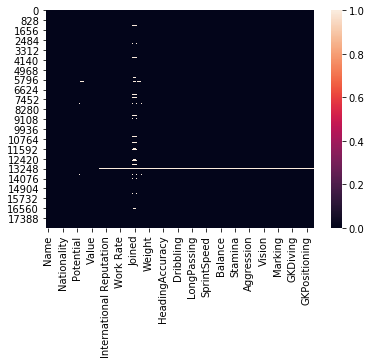

In [7]:
sns.heatmap(data=df.isnull() )
# it seems there is still a lot of null data

> # Age distribution

Text(0.5,1,'Age distribution of all players')

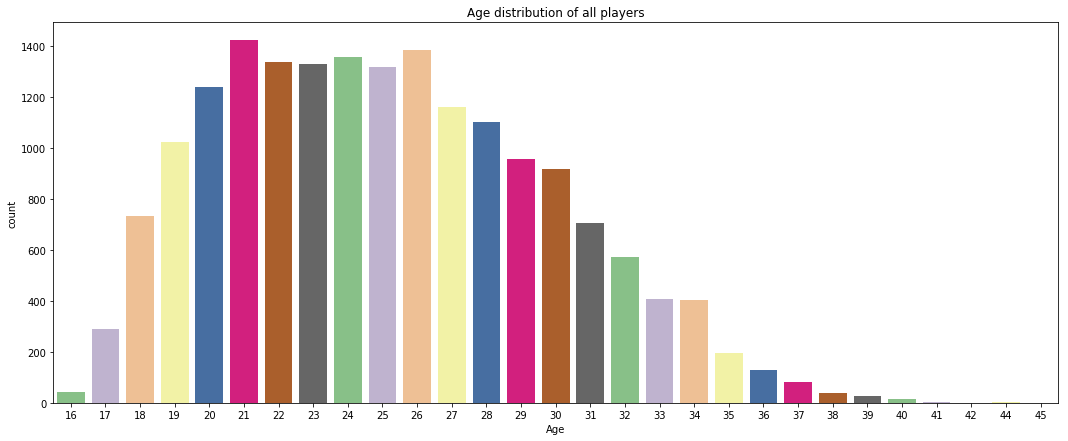

In [8]:
# find the age distribution
plt.figure(1, figsize=(18, 7))
sns.countplot( x= 'Age', data=df, palette='Accent')
plt.title('Age distribution of all players')
# It seems most of the age is distributed form 19 ~ 30

In [9]:
# The eldest players
df.sort_values(by= 'Age', ascending=False)[['Name','Nationality', 'Club', 'Position', 'Overall', 'Age']].head(5)

,Name,Nationality,Club,Position,Overall,Age
4741,O. Pérez,Mexico,Pachuca,GK,71,45
18183,K. Pilkington,England,Cambridge United,GK,48,44
17726,T. Warner,Trinidad & Tobago,Accrington Stanley,GK,53,44
10545,S. Narazaki,Japan,Nagoya Grampus,GK,65,42
7225,C. Muñoz,Argentina,CD Universidad de Concepción,GK,68,41


In [10]:
# The youngest players
df.sort_values(by= 'Age')[['Name','Nationality', 'Club', 'Position', 'Overall', 'Age']].head(5)

,Name,Nationality,Club,Position,Overall,Age
18206,G. Nugent,England,Tranmere Rovers,CM,46,16
17743,J. Olstad,Norway,Sarpsborg 08 FF,ST,52,16
13293,H. Massengo,France,AS Monaco,CDM,62,16
16081,J. Italiano,Australia,Perth Glory,LM,58,16
18166,N. Ayéva,Sweden,Örebro SK,ST,48,16


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


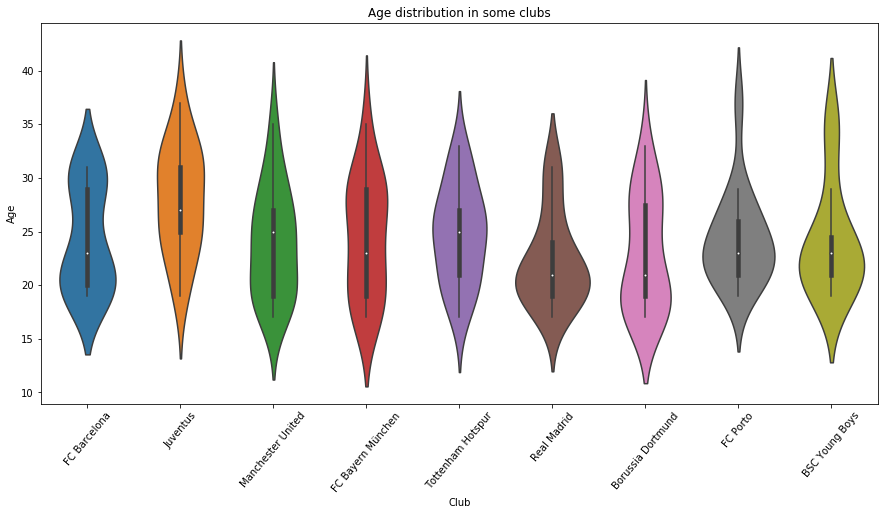

In [11]:
# Age distribution in few famous clubs
vals = ['Tottenham Hotspur' , 'Juventus' , 'Paris Sain-Germain' ,'FC Bayern München',
       'Real Madrid' , 'FC Barcelona' , 'Borussia Dortmund' , 'Manchester United' , 
       'FC Porto' , 'As Monaco' , 'BSC Young Boys']
df_club_age = df.loc[df['Club'].isin(vals) & df['Age']]
plt.figure(1, figsize=(15, 7))
sns.violinplot(x = 'Club', y = 'Age', data = df_club_age )
plt.title('Age distribution in some clubs')
plt.xticks(rotation=50)
plt.show()
# Real madrid is young, Juventus is not very young, Real Madrid perform very good in recent Champions League

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


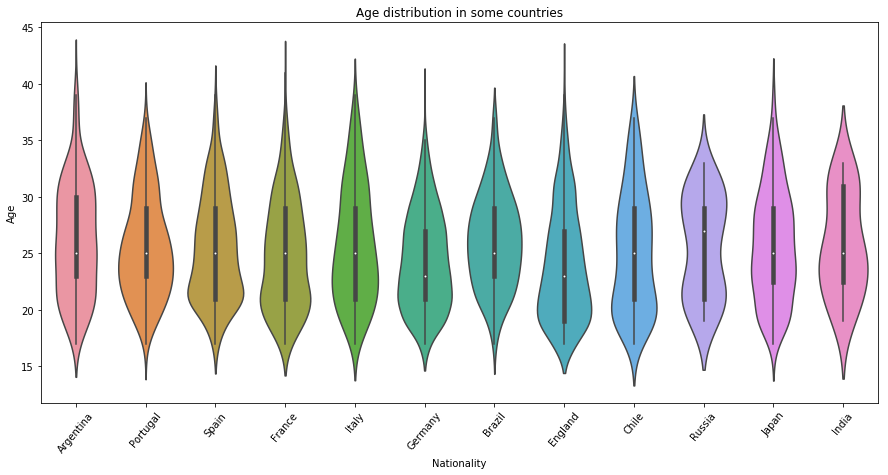

In [12]:
# Age distribution in few countries
vals = ['England' , 'Brazil' , 'Portugal' ,'Argentina',
       'Italy' , 'Spain' , 'Germany' , 'Russia' , 
       'Chile' , 'Japan' , 'India', 'France']
df_age_country = df.loc[df['Nationality'].isin(vals) & df['Age'] ]
plt.figure(1, figsize=(15, 7))
sns.violinplot(x = 'Nationality', y = 'Age', data = df_age_country)
plt.title('Age distribution in some countries')
plt.xticks(rotation = 50)
plt.show()
# It seems very average

> # Players' value

In [13]:
# handle all the players
def preprocess_value(x):
    x = str(x).replace('€', '')
    if('M' in str(x)):
        x = str(x).replace('M', '')
        x = float(x) * 1000000
    elif('K' in str(x)):
        x = str(x).replace('K', '')
        x = float(x) * 1000
    return float(x)

df['Value'] = df['Value'].apply(preprocess_value)

Text(0.5,1,'Value distribution of all players')

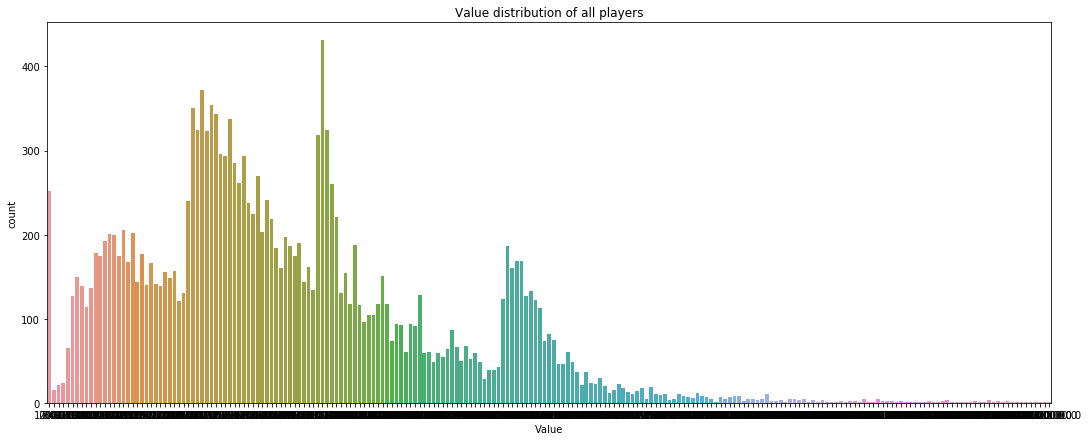

In [14]:
# Value ditribution
plt.figure(1, figsize=(18, 7))
sns.countplot( x= 'Value', data=df)
plt.title('Value distribution of all players')

In [15]:
# find the most expensive players
df.sort_values(by='Value', ascending=False)[['Name','Nationality', 'Club', 'Position', 'Overall', 'Value']].head(5)

,Name,Nationality,Club,Position,Overall,Value
2,Neymar Jr,Brazil,Paris Saint-Germain,LW,92,118500000.0
0,L. Messi,Argentina,FC Barcelona,RF,94,110500000.0
4,K. De Bruyne,Belgium,Manchester City,RCM,91,102000000.0
5,E. Hazard,Belgium,Chelsea,LF,91,93000000.0
15,P. Dybala,Argentina,Juventus,LF,89,89000000.0


> # Club

In [16]:
# Which club has the average expensive players
Club_value = df.groupby('Club')['Value'].mean()
Club_value.sort_values(ascending=False).head(5)
# These top guys is commen in Champion League

Club
Juventus             2.817900e+07
Real Madrid          2.649773e+07
FC Barcelona         2.583636e+07
Manchester City      2.383500e+07
FC Bayern München    2.341466e+07
Name: Value, dtype: float64

In [17]:
# which club has the highest total value 
club_values =df.groupby('Club')['Value'].sum()
club_values.sort_values(ascending=False).head(5)

Club
Real Madrid          874425000.0
FC Barcelona         852600000.0
Manchester City      786555000.0
Juventus             704475000.0
FC Bayern München    679025000.0
Name: Value, dtype: float64

> # Nationality

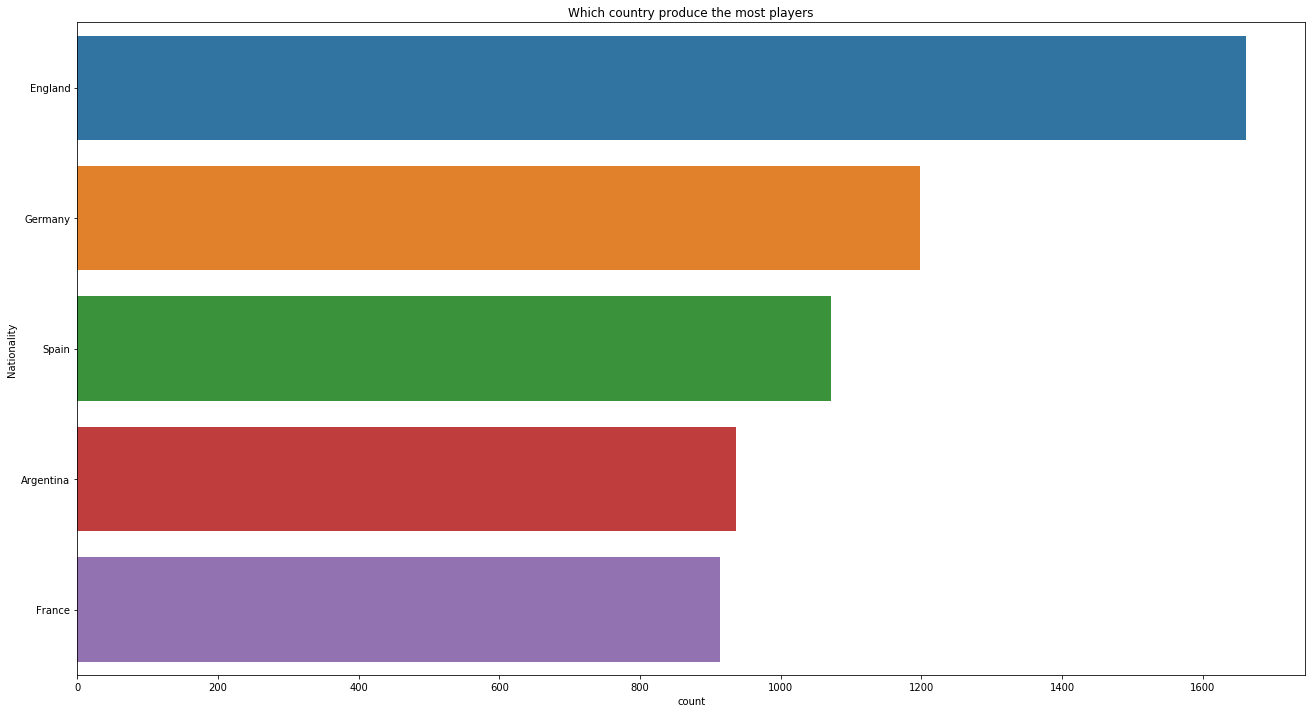

In [18]:
# Nationality players count
plt.figure(1, figsize=(22, 12))
plt.title("Which country produce the most players")
sns.countplot(y = "Nationality", order=df['Nationality'].value_counts().index[0:5] ,data=df)
# England is rich at good football players

> # Try to do the machine learning to predict the overall
In this part we try to do the machine learning of the players overall, it seems we can't include the player of the goalkeeper

In [19]:
# Include all the player except goalkeeper
vals = ['RF', 'ST', 'LW', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB']
ml_players= df.loc[df['Position'].isin(vals) & df['Position']]

In [20]:
# choose all the columns we need
ml_cols =          ['Crossing', 
                   'Finishing',
                   'HeadingAccuracy',
                   'ShortPassing', 
                   'Volleys', 
                   'Dribbling',
                   'Curve',
                   'FKAccuracy',
                   'LongPassing',
                   'BallControl',
                   'Acceleration',
                    'SprintSpeed',
                   'Agility',
                   'Reactions', 
                   'Balance',
                   'ShotPower', 
                   'Jumping',
                   'Stamina', 
                   'Strength',
                   'LongShots',
                   'Aggression',
                   'Interceptions',
                   'Positioning', 
                   'Vision', 
                   'Penalties',
                   'Composure',
                   'Marking',
                   'StandingTackle', 
                   'SlidingTackle',
                    'Overall'
                   ]

In [21]:
df_ml = pd.DataFrame(data=ml_players, columns=ml_cols)

In [22]:
# check the data
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16122 entries, 0 to 18206
Data columns (total 30 columns):
Crossing           16122 non-null float64
Finishing          16122 non-null float64
HeadingAccuracy    16122 non-null float64
ShortPassing       16122 non-null float64
Volleys            16122 non-null float64
Dribbling          16122 non-null float64
Curve              16122 non-null float64
FKAccuracy         16122 non-null float64
LongPassing        16122 non-null float64
BallControl        16122 non-null float64
Acceleration       16122 non-null float64
SprintSpeed        16122 non-null float64
Agility            16122 non-null float64
Reactions          16122 non-null float64
Balance            16122 non-null float64
ShotPower          16122 non-null float64
Jumping            16122 non-null float64
Stamina            16122 non-null float64
Strength           16122 non-null float64
LongShots          16122 non-null float64
Aggression         16122 non-null float64
Intercept

In [23]:
df_ml.isnull().any()

Crossing           False
Finishing          False
HeadingAccuracy    False
ShortPassing       False
Volleys            False
Dribbling          False
Curve              False
FKAccuracy         False
LongPassing        False
BallControl        False
Acceleration       False
SprintSpeed        False
Agility            False
Reactions          False
Balance            False
ShotPower          False
Jumping            False
Stamina            False
Strength           False
LongShots          False
Aggression         False
Interceptions      False
Positioning        False
Vision             False
Penalties          False
Composure          False
Marking            False
StandingTackle     False
SlidingTackle      False
Overall            False
dtype: bool

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
# Train test split
y = df_ml['Overall']
X = df_ml[['Crossing', 
           'Finishing',
           'HeadingAccuracy',
           'ShortPassing', 
           'Volleys', 
           'Dribbling',
           'Curve',
           'FKAccuracy',
           'LongPassing',
           'BallControl',
           'Acceleration',
            'SprintSpeed',
           'Agility',
           'Reactions', 
           'Balance',
           'ShotPower', 
           'Jumping',
           'Stamina', 
           'Strength',
           'LongShots',
           'Aggression',
           'Interceptions',
           'Positioning', 
           'Vision', 
           'Penalties',
           'Composure',
           'Marking',
           'StandingTackle', 
           'SlidingTackle']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
print('Coefficients:', lm.coef_)

Coefficients: [ 0.01564887  0.03082833  0.08553646  0.10401865 -0.00222351  0.00179104
  0.0071639   0.01035803 -0.01482419  0.16022195  0.04436857  0.03041178
 -0.0003876   0.2691366  -0.01649336  0.02136657  0.00264943  0.01348059
  0.04530585 -0.01892626 -0.00041104  0.0010888  -0.05018072 -0.04278984
  0.00849123  0.1458912   0.03476172  0.02442251 -0.02313741]


In [29]:
predictions = lm.predict(X_test)

Text(0,0.5,'Predicted y')

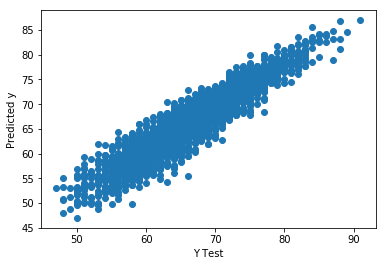

In [30]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted y')

In [31]:
# Evaluate the data
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#  the results seems perfect

MAE 1.941901647702578
MSE 6.0347329959401055
RMSE 2.456569355003051


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


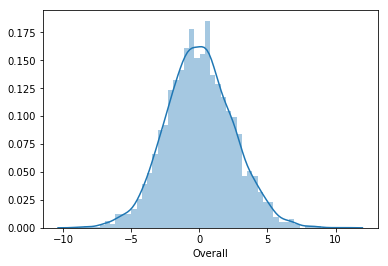

In [32]:
sns.distplot((y_test - predictions), bins=50)

In [33]:
# Get the effect of every parameter
coeffecients = pd.DataFrame(lm.coef_, X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Crossing,0.015649
Finishing,0.030828
HeadingAccuracy,0.085536
ShortPassing,0.104019
Volleys,-0.002224
Dribbling,0.001791
Curve,0.007164
FKAccuracy,0.010358
LongPassing,-0.014824
BallControl,0.160222


* It seems ball control, short passing, composure is the key role in the game.